## Applied Data Science - Assignment 3

### GDP of Countries over the years
#### Student ID: 20047638

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Importing data using pandas

In [13]:
# Importing relevant libraries and reading all the relavant data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import scipy.optimize as opt

# Importing data from excel files
df_co2_emm = pd.read_excel('CO2 emissions.xls')
df_meth_emm = pd.read_excel('methane emissions.xls')
df_no_emm = pd.read_excel('NO emissions.xls')
df_energy = pd.read_excel('Energy usage.xls')
df_gh_em = pd.read_excel('green house emissions.xls')
df_gdp = pd.read_excel('GDP per capita.xls')

#### Defining Functions

In [14]:
# Defining Functions
## Normalizing Array
def norm(array):
    
    """ Returns array normalised to [0,1] """
    min_val = np.min(array)
    max_val = np.max(array)
    scaled = (array - min_val) / (max_val - min_val)
    return scaled

## Normalising the data frame


def norm_df(df):
  
    # iterate over all columns
    for col in df.columns[4:]:     # excluding the first column
        df[col] = norm(df[col])
    return df

## Compute exponential function model


def exp_growth(t, scale, growth):
  
    f = scale * np.exp(growth * (t-1950)) 
    return f
## Compute Logistic function model


def logistics(t, a, k, t0):
    """ Computes logistics function with scale and incr as free parameters
    """
    
    f = a / (1.0 + np.exp(-k * (t - t0)))
    
    return f

#### Data Cleaning and Manupulation 

In [15]:
# Selecting only a few countries for all indicators
## Methane Emissions
df_meth_emm = df_meth_emm[df_meth_emm['Country Code']
                          .isin(df_co2_emm['Country Code'])]
df_meth_emm = df_meth_emm.reset_index(drop = True)
## Nitrous Oxide Emissions
df_no_emm = df_no_emm[df_no_emm['Country Code']
                      .isin(df_co2_emm['Country Code'])]
df_no_emm = df_no_emm.reset_index(drop = True)
## Green House Emissions
df_gh_em = df_gh_em[df_gh_em['Country Code'].isin(df_co2_emm['Country Code'])]
df_gh_em = df_gh_em.reset_index(drop = True)
## GDP of countries
df_gdp = df_gdp[df_gdp['Country Code'].isin(df_co2_emm['Country Code'])]
df_gdp = df_gdp.reset_index(drop = True)

## Calculating average values of emissions
df_co2_emm['avg CO2 em'] = df_co2_emm.iloc[:,4:].mean(axis = 1)
df_meth_emm['avg Meth em'] = df_meth_emm.iloc[:,4:].mean(axis = 1)
df_no_emm['avg NO em'] = df_no_emm.iloc[:,4:].mean(axis = 1)
df_energy['avg energy'] = df_energy.iloc[:,4:].mean(axis = 1)
df_gh_em['avg green house em'] = df_gh_em.iloc[:,4:].mean(axis = 1)
df_gdp['avg gdp'] = df_gdp.iloc[:,4:].mean(axis = 1)

#### Plotting GDP Data to understand the patterns

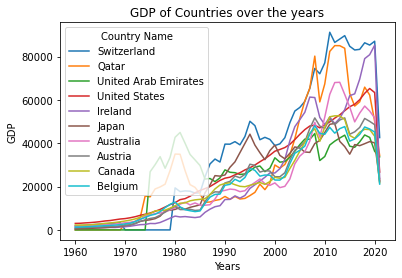

In [16]:
# Plotting the GDP of countries
dfg = df_gdp.groupby(by = 'Country Name').sum()
dfg.sort_values(by = dfg.columns[-1], ascending = False, inplace = True)
dfplot = dfg.iloc[:10].T.plot()
plt.xlabel("Years")
plt.ylabel("GDP")
plt.title("GDP of Countries over the years")
plt.show()

#### Picking one country (USA) to create exponential growth model

Fit parameter [2.87414257e+03 4.70436333e-02]


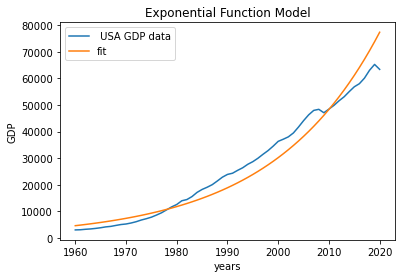


According to Exponential model, GDP of US in
2030: 123871.539269291
2040: 198280.24085760568
2050: 317385.6896141498


In [17]:
df_us = pd.read_excel('USA gdp.xlsx')
df_us["gdp_error"] = np.sqrt(df_us["gdp"])

# fit exponential growth
popt, pcorr = opt.curve_fit(exp_growth, df_us["year"], df_us["gdp"], 
                            sigma =  df_us["gdp_error"], absolute_sigma = True,  
                            p0 = [4e8, 0.06])

print("Fit parameter", popt)
df_us["exp_gdp"] = exp_growth(df_us["year"], *popt)

# Plot Actual vs Expected Data
plt.figure()
plt.plot(df_us["year"], df_us["gdp"], label = " USA GDP data")
plt.plot(df_us["year"], df_us["exp_gdp"], label = "fit")

plt.legend()
plt.xlabel('years')
plt.ylabel('GDP')
plt.title("Exponential Function Model")
plt.show()
print()

# predicting data based on the trained model
print("According to Exponential model, GDP of US in")
print("2030:", exp_growth(2030, *popt))
print("2040:", exp_growth(2040, *popt))
print("2050:", exp_growth(2050, *popt))

####  Picking one country (USA) to create Logistic Model

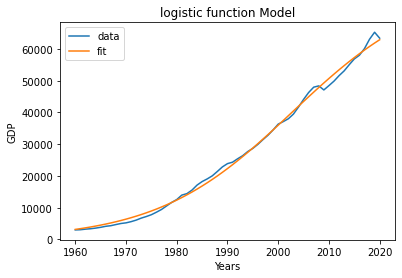

According to Logistic Model, GDP in
2030: 71015.84307176521
2040: 75635.1365784355
2050: 78042.6513255012


In [18]:
popt, pcorr = opt.curve_fit(logistics, df_us["year"], df_us["gdp"], 
                            p0=(2e9, 0.5, 2000.0))

df_us["gdp_exp"] = logistics(df_us["year"], *popt)

plt.figure()
plt.title("logistic function Model")
plt.plot(df_us["year"], df_us["gdp"], label="data")
plt.plot(df_us["year"], df_us["gdp_exp"], label="fit")
plt.xlabel("Years")
plt.ylabel("GDP")
plt.legend()
plt.show()

print("According to Logistic Model, GDP in")
print("2030:", logistics(2030, *popt))
print("2040:", logistics(2040, *popt))
print("2050:", logistics(2050, *popt))

#### Plotting Graphs of both the models for comparision

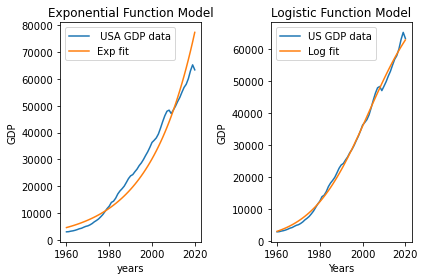

In [19]:
# Subplot for exponential model
plt.subplot(1, 2, 1)
plt.plot(df_us["year"], df_us["gdp"], label = " USA GDP data")
plt.plot(df_us["year"], df_us["exp_gdp"], label = "Exp fit")
plt.xlabel('years')
plt.ylabel('GDP')
plt.title("Exponential Function Model")
plt.legend()

# Subplot for Logistic Function Model
plt.subplot(1, 2, 2)
plt.plot(df_us["year"], df_us["gdp"], label="US GDP data")
plt.plot(df_us["year"], df_us["gdp_exp"], label="Log fit")
plt.xlabel("Years")
plt.ylabel("GDP")
plt.title("Logistic Function Model")
plt.legend()
plt.tight_layout()


#### Normalising the other indicators to find appropriate clusters

In [20]:
# normalise data
df_co2_emm = norm_df(df_co2_emm)
df_meth_emm = norm_df(df_meth_emm)
df_no_emm = norm_df(df_no_emm)
df_energy = norm_df(df_energy)
df_gh_em = norm_df(df_gh_em)
df_gdp = norm_df(df_gdp)

# grouping into one dataframe
df_group = pd.DataFrame(df_co2_emm['avg CO2 em'])
e1 = df_meth_emm['avg Meth em']
e2 = df_no_emm['avg NO em'] 
e3 = df_energy['avg energy']
e4 = df_gh_em['avg green house em']
e5 = df_gdp['avg gdp']
e6 = df_meth_emm['Country Name']
df_group = df_group.join(e1)
df_group = df_group.join(e2)
df_group = df_group.join(e3)
df_group = df_group.join(e4)
df_group = df_group.join(e5)
df_group = df_group.join(e6)
df_group = df_group.dropna()

#### Finding clusters with the given indicators

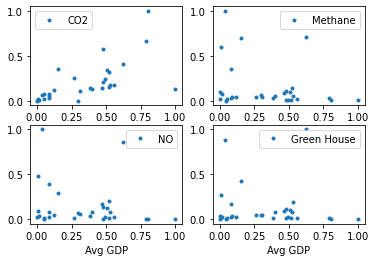

In [21]:
fig, axes = plt.subplots(2, 2)
ax_1 = axes[0,0]
ax_2 = axes[0,1]
ax_3 = axes[1,0]
ax_4 = axes[1,1]

ax_1.plot(df_group["avg gdp"], df_group["avg CO2 em"], "o", 
          markersize = 3, label = "CO2")
ax_1.legend()
ax_2.plot(df_group["avg gdp"], df_group["avg Meth em"], "o", 
          markersize = 3, label = "Methane")
ax_2.legend()
ax_3.plot(df_group["avg gdp"], df_group["avg NO em"], "o", 
          markersize = 3, label = "NO")
ax_3.legend()
ax_4.plot(df_group["avg gdp"], df_group["avg green house em"], "o", 
          markersize = 3, label = "Green House")
ax_4.legend()

axes[0,0].set_xlabel('Avg GDP')
axes[0,1].set_xlabel('Avg GDP')
axes[1,0].set_xlabel('Avg GDP')
axes[1,1].set_xlabel('Avg GDP')
plt.show()

#### Cluster of Average GDP with CO2 emission is more clear

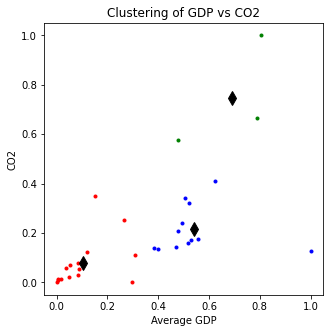

In [23]:
# K-means set up the clusters, 3 expected clusters
kmeans = cluster.KMeans(n_clusters = 3)

## extract columns for fitting
df_fit = df_group[["avg gdp", "avg CO2 em"]].copy()
kmeans.fit(df_fit)     

## extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

## plot using the labels to select colour

plt.figure(figsize = (5.0,5.0))

col = ["red","blue", "green"]
for l in range(3):     # loop over the different labels
    plt.plot(df_fit["avg gdp"][labels == l], df_fit["avg CO2 em"][labels == l],
             "o", markersize = 3, color = col[l])
    
## show cluster centres
for ic in range(3):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize = 10)
    
plt.xlabel("Average GDP")
plt.ylabel("CO2")
plt.title("Clustering of GDP vs CO2")
plt.show()

#### Selecting countries from each cluster from the DataFrame 'df_group'

In [24]:
df_group

,avg CO2 em,avg Meth em,avg NO em,avg energy,avg green house em,avg gdp,Country Name
1,0.665365,0.027143,0.007868,0.041716,0.018994,0.788957,United Arab Emirates
3,0.321221,0.140308,0.202423,0.030496,0.081594,0.521788,Australia
4,0.157872,0.009138,0.014350,0.027113,0.012396,0.517045,Austria
5,0.240514,0.012302,0.026844,0.040269,0.022112,0.492846,Belgium
7,0.030196,0.349200,0.398043,0.063242,0.169792,0.085664,Brazil
8,0.341407,0.094602,0.121711,0.472247,0.102621,0.505339,Canada
9,0.126168,0.005167,0.007218,0.086243,0.008201,1.000000,Switzerland
10,0.059334,1.000000,1.000000,0.048367,0.886645,0.038483,China
12,0.111866,0.036613,0.063801,0.091390,0.049085,0.308963,Spain
13,0.022150,0.000000,0.000747,0.260662,0.000000,0.048129,Fiji


#### Ploting the GDP data of selected countries and Fitting data with Logistic model

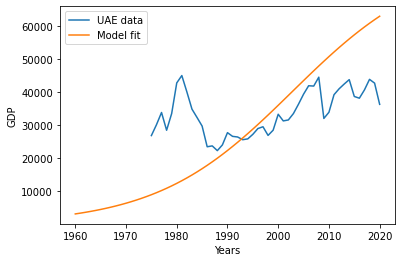

In [25]:
#Selected country United Arab Emirates from Cluster 1 - high average GDP
df_uae = pd.read_excel('UAE gdp.xlsx')
plt.plot(df_uae["year"], df_uae["gdp"], label = "UAE data")
plt.plot(df_us["year"], df_us["gdp_exp"], label = "Model fit")
plt.xlabel("Years")
plt.ylabel('GDP')
plt.legend()
plt.show()

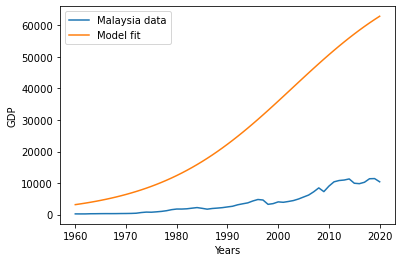

In [26]:
# Selected Country Malaysia from cluster 2 - low average GDP
df_malay = pd.read_excel('Malaysia gdp.xlsx')
plt.plot(df_malay["year"], df_malay["gdp"], label = "Malaysia data")
plt.plot(df_us["year"], df_us["gdp_exp"], label = "Model fit")
plt.xlabel("Years")
plt.ylabel('GDP')
plt.legend()
plt.show()

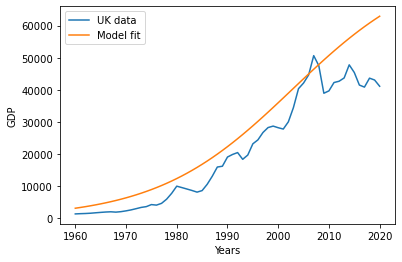

In [27]:
# Selected Country UK from cluster 3 - mid-level average GDP
df_uk = pd.read_excel('UK gdp.xlsx')
plt.plot(df_uk["year"], df_uk["gdp"], label = "UK data")
plt.plot(df_us["year"], df_us["gdp_exp"], label = "Model fit")
plt.xlabel("Years")
plt.ylabel('GDP')
plt.legend()
plt.show()

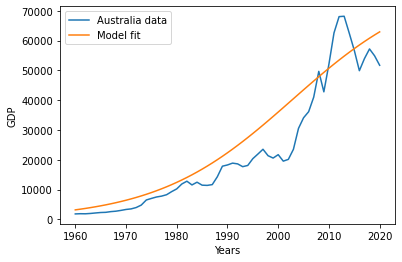

In [28]:
# Selected another Country Australia from cluster 3 - mid-level average GDP
df_aus = pd.read_excel('Australia gdp.xls')
plt.plot(df_aus["year"], df_aus["gdp"], label = "Australia data")
plt.plot(df_us["year"], df_us["gdp_exp"], label = "Model fit")
plt.xlabel("Years")
plt.ylabel('GDP')
plt.legend()
plt.show()

#### Creating Subplots for Compact Data

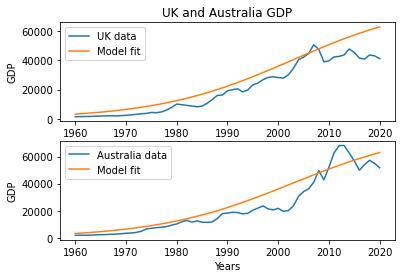

In [29]:
# Plotting UK and Australia Data (same cluster)
fig, axes = plt.subplots(2)
ax_uk = axes[0]
ax_aus = axes[1]
ax_uk.plot(df_uk["year"], df_uk["gdp"], label = "UK data")
ax_uk.plot(df_us["year"], df_us["gdp_exp"], label = "Model fit")
ax_aus.plot(df_aus["year"], df_aus["gdp"], label = "Australia data")
ax_aus.plot(df_us["year"], df_us["gdp_exp"], label = "Model fit")
ax_uk.legend()
ax_aus.legend()
axes[1].set_xlabel('Years')
axes[1].set_ylabel('GDP')
axes[0].set_ylabel('GDP')
axes[0].set_title('UK and Australia GDP')
plt.show()

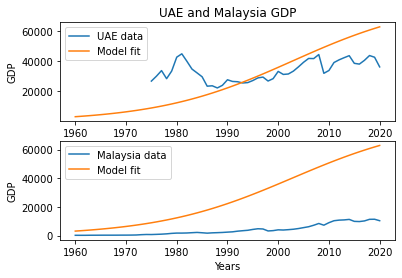

In [30]:
# Plotting UAE and Malaysia Data (different cluster)
fig, axes = plt.subplots(2)
ax_uae = axes[0]
ax_malay = axes[1]
ax_uae.plot(df_uae["year"], df_uae["gdp"], label = "UAE data")
ax_uae.plot(df_us["year"], df_us["gdp_exp"], label = "Model fit")
ax_malay.plot(df_malay["year"], df_malay["gdp"], label = "Malaysia data")
ax_malay.plot(df_us["year"], df_us["gdp_exp"], label = "Model fit")
ax_uae.legend()
ax_malay.legend()
axes[1].set_xlabel('Years')
axes[1].set_ylabel('GDP')
axes[0].set_ylabel('GDP')
axes[0].set_title('UAE and Malaysia GDP')
plt.show()